In [1]:
library(data.table)
library(ggplot2)
theme_set(theme_bw())


In [57]:
setwd('~/Desktop/bacterial_dating_aerobic_predictor')

In [2]:
system('ls -d data/*.predictions.csv> data/predictions_data_files.txt')
files = fread('data/predictions_data_files.txt', header=F)
d = files[,fread(V1), by=V1]
d[1:3]

V1,node,prediction,model,probability
<chr>,<chr>,<int>,<chr>,<dbl>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X1(0),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1867354
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1835381
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1898384


In [3]:
d[, dataset := gsub('data/(.+).csv.predictions.csv', '\\1', V1)]
d[1:3]

V1,node,prediction,model,probability,dataset
<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X1(0),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1867354,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1835381,bacdive_scape_20230315.json.parsed.temperature.with_cyanos
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1898384,bacdive_scape_20230315.json.parsed.temperature.with_cyanos


In [4]:
d[dataset == 'bacdive_scape_20230315.json.parsed.temperature.with_cyanos', dataset2 := '1=temperature-prediction']
data.table(table(d$dataset2))


V1,N
<chr>,<int>
1=temperature-prediction,16104


In [5]:
d[, predictor := gsub('.*/(.+).model', '\\1', model)]
d[1:3]

V1,node,prediction,model,probability,dataset,dataset2,predictor
<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X1(0),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1867354,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction,AdaBoostClassifier
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1835381,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction,AdaBoostClassifier
data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scape_20230315.json.parsed.temperature.with_cyanos.csv.models/AdaBoostClassifier.model,0.1898384,bacdive_scape_20230315.json.parsed.temperature.with_cyanos,1=temperature-prediction,AdaBoostClassifier


In [6]:
d[, V1 := NULL]
d[, dataset := NULL]
setnames(d, 'dataset2', 'dataset')
d[, model := NULL]
d[1:3]

node,prediction,probability,dataset,predictor
<chr>,<int>,<dbl>,<chr>,<chr>
AABM5X1(0),0,0.1867354,1=temperature-prediction,AdaBoostClassifier
AABM5X2(1),0,0.1835381,1=temperature-prediction,AdaBoostClassifier
AABM5X3(2),0,0.1898384,1=temperature-prediction,AdaBoostClassifier


# Distributions of prediction probabilities

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


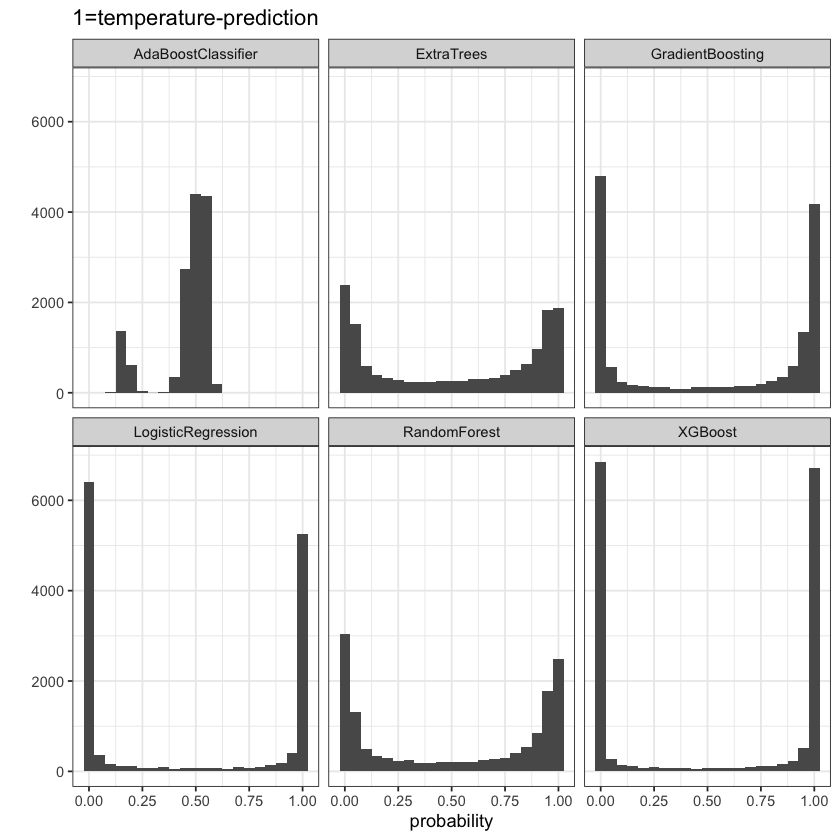

In [7]:
for (dataset_name in sort(unique(d$dataset))){
    print(qplot(data=d[!(predictor %in% c('GaussianNB','Perceptron'))], probability, binwidth=0.05, main=dataset_name)+facet_wrap(~predictor))
}